# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [130]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 12306 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


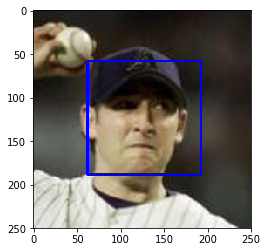

In [131]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [132]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

def get_face_detector_accuracy(detector, human_files, dog_files):
    hacc = 0
    dacc = 0
    num_images = len(human_files)
    for i in tqdm(range(num_images)):
        if detector(human_files[i]):
            hacc += 1
        else:
            pass
            #print("No human found in {}".format(human_files[i]))
        if detector(dog_files[i]):
            dacc += 1
            #print("Found human in dog photo {}".format(dog_files[i]))

    print("Human(s) found in {}% of the {} human pictures".format((hacc/num_images)*100, num_images))
    print("Human(s) found in {}% of the {} dog pictures".format((dacc/num_images)*100, num_images))
                  
get_face_detector_accuracy(face_detector, human_files_short, dog_files_short)

100%|██████████| 100/100 [00:09<00:00, 11.03it/s]

Human(s) found in 100.0% of the 100 human pictures
Human(s) found in 10.0% of the 100 dog pictures


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

/home/tyler/Dropbox/udacity-deep-learning/deep-learning-v2-pytorch/project-dog-classification/src/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile=True)
/home/tyler/Dropbox/udacity-deep-learning/deep-learning-v2-pytorch/project-dog-classification/src/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/home/tyler/Dropbox/udacity-deep-learning/deep-learning-v2-pytorch/project-dog-classification/src/detector.py:79: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile=True)
/home/tyler/Dropbox/udacity-deep-learning/deep-learning-v2-pytorch/project-dog-classification/src/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

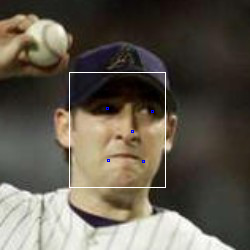

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

# Idea use transfer learning to train a binary classifier for face or no face
#   or follow modern face detection tutorial online
# imported code from "https://github.com/TropComplique/mtcnn-pytorch"
from PIL import Image
from src import detect_faces, show_bboxes


def face_detector2(img_path):
    img = Image.open(img_path)
    bboxes, landmarks = detect_faces(img)
    return len(bboxes) >= 1
    
img = Image.open(human_files[0])
bboxes, landmarks = detect_faces(img)
show_bboxes(img, bboxes, landmarks )



In [6]:
#get_face_detector_accuracy(face_detector2, human_files_short, dog_files_short)

  0%|          | 0/100 [00:00<?, ?it/s]/home/tyler/Dropbox/udacity-deep-learning/deep-learning-v2-pytorch/project-dog-classification/src/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile=True)
/home/tyler/Dropbox/udacity-deep-learning/deep-learning-v2-pytorch/project-dog-classification/src/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/home/tyler/Dropbox/udacity-deep-learning/deep-learning-v2-pytorch/project-dog-classification/src/detector.py:79: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile=True)
/home/tyler/Dropbox/udacity-deep-learning/deep-learning-v2-pytorch/project-dog-classification/src/get_nets.py:115: UserWarning: Implicit dimension choi

Human(s) found in 100.0% of the 100 human pictures
Human(s) found in 26.0% of the 100 dog pictures


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [134]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print("Using cuda")

Using cuda


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [135]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    for param in VGG16.features.parameters():
        param.requires_grad = False
    for param in VGG16.classifier.parameters():
        param.requires_grad = False
        
    img = Image.open(img_path)
    #print(img)
    img
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor(), normalize])
    img_tensor = data_transform(img)
    if use_cuda:
        img_tensor = img_tensor.cuda()
    #data = np.asarray(img, dtype="float32")
    #print(VGG16)
    img_tensor_view = img_tensor.view(1,img_tensor.size(0), img_tensor.size(1), img_tensor.size(2))
    VGG16.eval()
    output = VGG16(img_tensor_view)
    _, pred = torch.max(output, 1)  
    
    ## Return the *index* of the predicted class for that image
    
    return pred # predicted class index

#VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [136]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_index = VGG16_predict(img_path)
    
    return class_index >= 151 and class_index <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

def get_dog_detector_accuracy(dog_detector, human_files, dog_files):
    dogs_in_human_files = 0
    dogs_in_dog_files = 0
    num_imgs = len(human_files)
    for i in tqdm(range(num_imgs)):
        if dog_detector(human_files[i]):
            dogs_in_human_files += 1
            #print("Found dog in human file {}".format(human_files[i]))

        if dog_detector(dog_files[i]):
            dogs_in_dog_files += 1
        else:
            #print("Found no dog in dog photo {}".format(dog_files[i]))
            pass

    print("Dogs found in human photos {}% of the time in the {} human pictures".format((dogs_in_human_files/num_imgs)*100, num_imgs))
    print("Dogs found in dog photos {}% of the time in the {} dog pictures".format((dogs_in_dog_files/num_imgs)*100, num_imgs))
    
get_dog_detector_accuracy(dog_detector, human_files_short, dog_files_short)

100%|██████████| 100/100 [00:01<00:00, 54.19it/s]

Dogs found in human photos 0.0% of the time in the 100 human pictures
Dogs found in dog photos 100.0% of the time in the 100 dog pictures


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# define VGG16 model
ResNet50 = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    ResNet50 = ResNet50.cuda()
    print("Using cuda")

Using cuda


In [12]:
def ResNet50_predict(img_path):
    for param in ResNet50.parameters():
        param.requires_grad = False
  
    img = Image.open(img_path)
    #print(img)
    img
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor(), normalize])
    img_tensor = data_transform(img)
    if use_cuda:
        img_tensor = img_tensor.cuda()
    #data = np.asarray(img, dtype="float32")
    #print(img_tensor.size())
    #print(VGG16)
    img_tensor_view = img_tensor.view(1,img_tensor.size(0), img_tensor.size(1), img_tensor.size(2))
    #print(img_tensor_view.size())
    ResNet50.eval()
    output = ResNet50(img_tensor_view)
    _, pred = torch.max(output, 1)  
    
    ## Return the *index* of the predicted class for that image
    
    return pred # predicted class index

#print(ResNet50_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'))

In [13]:
def dog_detector2(img_path):
    ## TODO: Complete the function.
    class_index = ResNet50_predict(img_path)
    
    return class_index >= 151 and class_index <= 268

In [14]:
get_dog_detector_accuracy(dog_detector2, human_files_short, dog_files_short)
# free memory of resnet50 model
del ResNet50

100%|██████████| 100/100 [00:02<00:00, 35.33it/s]

Dogs found in human photos 3.0% of the time in the 100 human pictures
Dogs found in dog photos 100.0% of the time in the 100 dog pictures


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [54]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size=20
num_workers=0
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.5, 0.5, 0.5])
train_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(10),
                                 transforms.RandomResizedCrop(224),
                                 transforms.ToTensor(), normalize])
transforms = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 normalize])

train_data_path = 'dogImages/train'
train_dataset = datasets.ImageFolder( root=train_data_path, transform=train_transforms )
train_loader = DataLoader( train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True )
valid_data_path = 'dogImages/valid'
valid_dataset = datasets.ImageFolder( root=valid_data_path, transform=transforms )
valid_loader = DataLoader( valid_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True )
test_data_path = 'dogImages/test'
test_dataset = datasets.ImageFolder( root=test_data_path, transform=transforms )
test_loader = DataLoader( test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True )

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

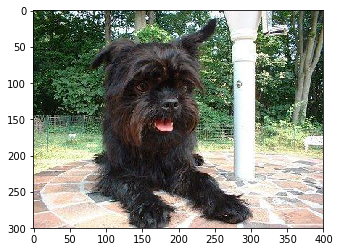

In [56]:
from PIL import Image
import matplotlib.image as mpimg
img = Image.open('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')
#img = mpimg.imread('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')
plt.imshow(img)

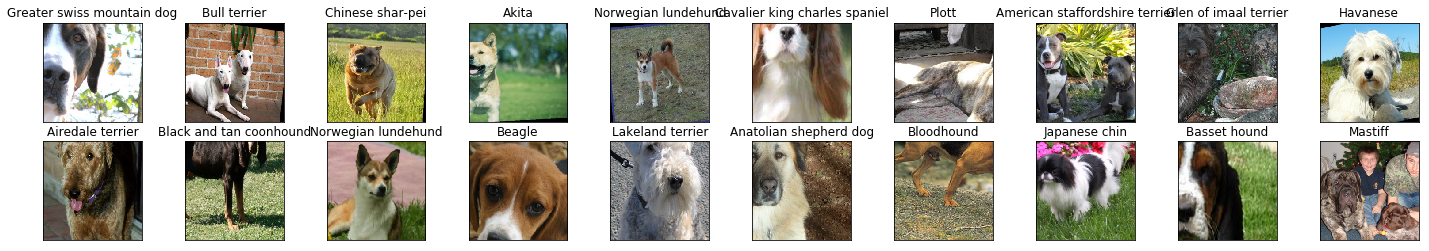

In [57]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
class_names = [item[4:].replace("_", " ") for item in train_loader.dataset.classes]
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(class_names[labels[idx]])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  My code resizes to 224x224 because that is the expected input size of the network.  My dataset was augmented to account for some minor rotation and also flipped horizontal poses

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [58]:

import torch
import torch.nn as nn
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()
torch.cuda.empty_cache()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)# 112
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)# 56
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten_dim = 128*7*7
        self.dense1 = nn.Linear(self.flatten_dim , 1024)
        self.output = nn.Linear(1024, 133)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = self.pool(x)
        x = x.view(-1, self.flatten_dim)
        x = self.dropout(x)
        x = F.relu(self.dense1(x))
        x = self.dropout(x)
        #x = F.relu(self.dense2(x))
        x = self.output(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    print("Using that gouda cuda")
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dense1): Linear(in_features=6272, out_features=1024, bias=True)
  (output): Linear(in_features=1024, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)
Using that gouda cuda


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ My network uses a pyramid structure to double the number of convolution filters and reduce the image size as is typical.  It also uses a fully-connected classification structure at the end to learn the classes from the more absract representation following the convolutions.  I also use two convolutions using 128 filters to introduce more non-linearity into the model

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [59]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.001)

#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [106]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        try:
            for batch_idx, (data, target) in enumerate(loaders['train']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## find the loss and update the model parameters accordingly
                ## record the average training loss, using something like
                ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                #train_loss += loss.item()*data.size(0)
                train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        except IOError as error:
            print(error + " " + error.filename)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            #valid_loss += loss.item()*data.size(0)

        #train_loss = train_loss/len(loaders['train'].dataset)
        #valid_loss = valid_loss/len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model


In [60]:
# train the model

model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.885564 	Validation Loss: 4.873752
Validation loss decreased (inf --> 4.873752). Saving model...
Epoch: 2 	Training Loss: 4.873822 	Validation Loss: 4.872275
Validation loss decreased (4.873752 --> 4.872275). Saving model...
Epoch: 3 	Training Loss: 4.830268 	Validation Loss: 4.715707
Validation loss decreased (4.872275 --> 4.715707). Saving model...
Epoch: 4 	Training Loss: 4.734202 	Validation Loss: 4.655063
Validation loss decreased (4.715707 --> 4.655063). Saving model...
Epoch: 5 	Training Loss: 4.689560 	Validation Loss: 4.618007
Validation loss decreased (4.655063 --> 4.618007). Saving model...
Epoch: 6 	Training Loss: 4.681499 	Validation Loss: 4.571311
Validation loss decreased (4.618007 --> 4.571311). Saving model...
Epoch: 7 	Training Loss: 4.648269 	Validation Loss: 4.524539
Validation loss decreased (4.571311 --> 4.524539). Saving model...
Epoch: 8 	Training Loss: 4.635637 	Validation Loss: 4.524339
Validation loss decreased (4.524539 --> 4.524339

Epoch: 86 	Training Loss: 2.819140 	Validation Loss: 2.745120
Epoch: 87 	Training Loss: 2.792499 	Validation Loss: 2.752973
Epoch: 88 	Training Loss: 2.759502 	Validation Loss: 2.707160
Epoch: 89 	Training Loss: 2.756391 	Validation Loss: 2.639374
Validation loss decreased (2.685158 --> 2.639374). Saving model...
Epoch: 90 	Training Loss: 2.774158 	Validation Loss: 2.700845
Epoch: 91 	Training Loss: 2.753050 	Validation Loss: 2.770769
Epoch: 92 	Training Loss: 2.745371 	Validation Loss: 2.717335
Epoch: 93 	Training Loss: 2.742342 	Validation Loss: 2.686738
Epoch: 94 	Training Loss: 2.765637 	Validation Loss: 2.713449
Epoch: 95 	Training Loss: 2.758451 	Validation Loss: 2.702181
Epoch: 96 	Training Loss: 2.728713 	Validation Loss: 2.674833
Epoch: 97 	Training Loss: 2.748612 	Validation Loss: 2.712420
Epoch: 98 	Training Loss: 2.726840 	Validation Loss: 2.761532
Epoch: 99 	Training Loss: 2.712035 	Validation Loss: 2.609136
Validation loss decreased (2.639374 --> 2.609136). Saving model..

In [61]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [62]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.626804


Test Accuracy: 34% (292/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [107]:
## TODO: Specify data loaders
import torchvision.transforms as transforms
normalize_transfer = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
#normalize_transfer = transforms.Normalize(mean=[0.5, 0.5, 0.5],
#                                     std=[0.5, 0.5, 0.5])
train_transforms_transfer = transforms.Compose([transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(10),
                                 transforms.RandomResizedCrop(224),
                                 transforms.ToTensor(),
                                 normalize_transfer])
transforms_transfer = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 normalize_transfer])

train_transfer_data_path = 'dogImages/train'
train_transfer_dataset = datasets.ImageFolder( root=train_transfer_data_path, transform=train_transforms_transfer )
train_transfer_loader = DataLoader( train_transfer_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True )
valid_transfer_data_path = 'dogImages/valid'
valid_transfer_dataset = datasets.ImageFolder( root=valid_transfer_data_path, transform=transforms_transfer )
valid_transfer_loader = DataLoader( valid_transfer_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True )
test_transfer_data_path = 'dogImages/test'
test_transfer_dataset = datasets.ImageFolder( root=test_transfer_data_path, transform=transforms_transfer )
test_transfer_loader = DataLoader( test_transfer_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True )

loaders_transfer = {'train': train_transfer_loader, 'valid': valid_transfer_loader, 'test': test_transfer_loader}

In [108]:
def imshow_imagenet(inp):
    inp = inp.transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

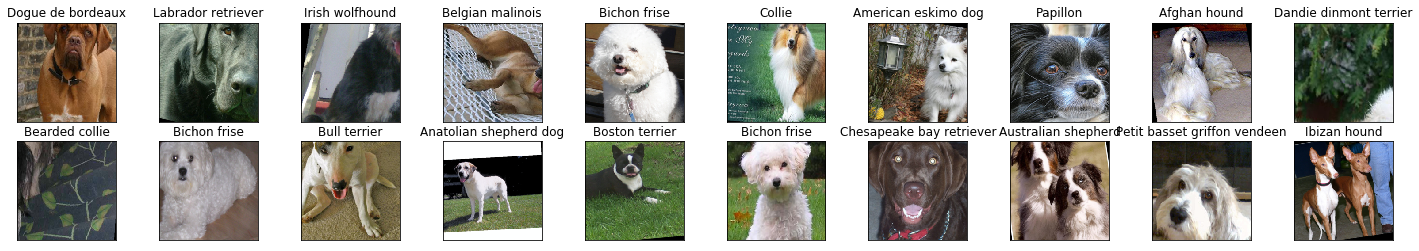

In [109]:
# obtain one batch of training images
dataiter = iter(train_transfer_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
class_names = [item[4:].replace("_", " ") for item in train_transfer_loader.dataset.classes]
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow_imagenet(images[idx])
    ax.set_title(class_names[labels[idx]])

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [116]:
import torchvision.models as models
import torch.nn as nn
from torch.optim import lr_scheduler

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)


for param in model_transfer.parameters():
    param.requires_grad = False
    
#model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features, len(class_names))
model_transfer.fc = nn.Linear(in_features=model_transfer.fc.in_features, out_features=133, bias=True)
#model_transfer.fc.requires_grad = True
print(model_transfer)
if use_cuda:
    model_transfer = model_transfer.cuda()
    


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ My network is based on the resnet50 architecture because it has low top-1 and top-5 error rates.  Since the number of images in the training set is only a few thousand, and the inputs are similar to classes that are already recognized by the model, I have chosen to only update the classification phase of the model, so that the model only outputs only dog breed classes.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [118]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001, momentum=0.9)
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_transfer, step_size=7, gamma=0.1)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [119]:
# train the model
n_epochs = 100
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.131241 	Validation Loss: 2.884247
Validation loss decreased (inf --> 2.884247). Saving model...
Epoch: 2 	Training Loss: 2.859806 	Validation Loss: 1.829369
Validation loss decreased (2.884247 --> 1.829369). Saving model...
Epoch: 3 	Training Loss: 2.169135 	Validation Loss: 1.304605
Validation loss decreased (1.829369 --> 1.304605). Saving model...
Epoch: 4 	Training Loss: 1.791965 	Validation Loss: 1.023419
Validation loss decreased (1.304605 --> 1.023419). Saving model...
Epoch: 5 	Training Loss: 1.563699 	Validation Loss: 0.863100
Validation loss decreased (1.023419 --> 0.863100). Saving model...
Epoch: 6 	Training Loss: 1.455638 	Validation Loss: 0.774604
Validation loss decreased (0.863100 --> 0.774604). Saving model...
Epoch: 7 	Training Loss: 1.306578 	Validation Loss: 0.688615
Validation loss decreased (0.774604 --> 0.688615). Saving model...
Epoch: 8 	Training Loss: 1.262686 	Validation Loss: 0.646702
Validation loss decreased (0.688615 --> 0.646702

Epoch: 91 	Training Loss: 0.636926 	Validation Loss: 0.336708
Validation loss decreased (0.336999 --> 0.336708). Saving model...
Epoch: 92 	Training Loss: 0.600866 	Validation Loss: 0.348004
Epoch: 93 	Training Loss: 0.636925 	Validation Loss: 0.329625
Validation loss decreased (0.336708 --> 0.329625). Saving model...
Epoch: 94 	Training Loss: 0.626316 	Validation Loss: 0.349855
Epoch: 95 	Training Loss: 0.612817 	Validation Loss: 0.338055
Epoch: 96 	Training Loss: 0.619658 	Validation Loss: 0.352508
Epoch: 97 	Training Loss: 0.622114 	Validation Loss: 0.342320
Epoch: 98 	Training Loss: 0.620781 	Validation Loss: 0.334970
Epoch: 99 	Training Loss: 0.626188 	Validation Loss: 0.357478
Epoch: 100 	Training Loss: 0.601400 	Validation Loss: 0.342665


In [120]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [121]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.347542


Test Accuracy: 88% (740/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [124]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    for param in model_transfer.parameters():
        param.requires_grad = False
        
    img = Image.open(img_path)
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor(), normalize])
    img_tensor = data_transform(img)
    if use_cuda:
        img_tensor = img_tensor.cuda()
    #data = np.asarray(img, dtype="float32")
    #print(VGG16)
    img_tensor_view = img_tensor.view(1,img_tensor.size(0), img_tensor.size(1), img_tensor.size(2))
    model_transfer.eval()
    output = model_transfer(img_tensor_view)
    _, pred = torch.max(output, 1) 
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [149]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    error = False
    if face_detector(img_path):
        print("Hello, human!")
    elif dog_detector(img_path):
        print("Hello, doggy!")
    else:
        print("Error.  You don't look like a human or dog")
        error = True
    img = Image.open(img_path)
    img
    #img = mpimg.imread('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')
    plt.figure()
    plt.imshow(img)
    plt.show()
    if not error:
        breed = predict_breed_transfer(img_path)
        print("You look like a...")
        print(breed)
    print("\n")
    
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Manual pruning of incorrectly classified dog/human images may help with training.  My algorithm could be made more robust to handle images with both a human and a dog.  For instance the human or dog that is the focus of the photograph may receive the greeting, or both could receive a greeting.  As always more input image data would help the model train towards a more accurate set of weights.  These could either be more photographs of dogs at different angles or even more augmented versions of the existing photographs.  

Handling mixed breeds or mutts would also be useful since most dogs are not pure bred. 

Showing an overlay of the dog breed that matches a human face would be an interesting visualization since most people dont actually know the names of many dog breeds

Hello, human!


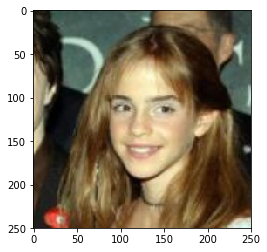

You look like a...
Cavalier king charles spaniel


Hello, human!


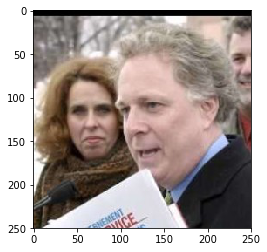

You look like a...
Irish wolfhound


Hello, human!


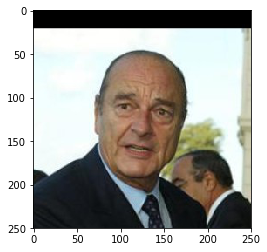

You look like a...
Lowchen


Hello, doggy!


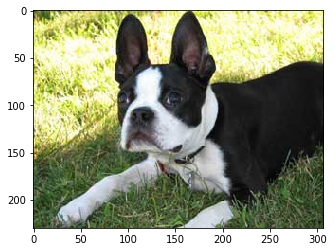

You look like a...
Boston terrier


Hello, doggy!


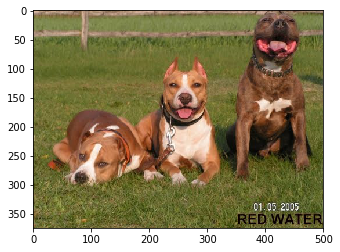

You look like a...
American staffordshire terrier


Hello, human!


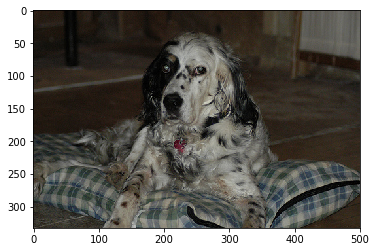

You look like a...
English setter




In [150]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
import random
for i in range(3):
    run_app(random.choice(human_files))
for i in range(3):
    run_app(random.choice(dog_files))